In [1]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))# Dataset is now stored in a Pandas Dataframe

In [3]:
df.head()

,undefined,Before optimisation,Time
0,394.436010,2.824903,2021-11-13 00:45:00
1,0.250412,0.034603,2021-11-13 03:00:00
2,826.058421,6.392970,2021-11-13 03:15:00
3,1092.980113,6.823626,2021-11-13 03:30:00
4,1218.426416,6.660659,2021-11-13 03:45:00


In [4]:
df.rename(columns={'undefined':'Cooling Load'}, inplace=True)
df.head()

,Cooling Load,Before optimisation,Time
0,394.436010,2.824903,2021-11-13 00:45:00
1,0.250412,0.034603,2021-11-13 03:00:00
2,826.058421,6.392970,2021-11-13 03:15:00
3,1092.980113,6.823626,2021-11-13 03:30:00
4,1218.426416,6.660659,2021-11-13 03:45:00


In [5]:
import seaborn as sns

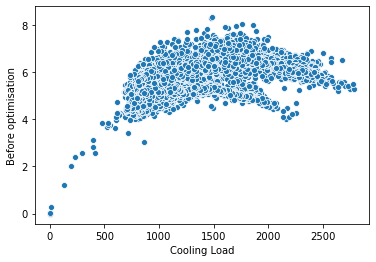

In [6]:
sns.scatterplot(x='Cooling Load', y='Before optimisation', data=df)

In [7]:
from math import ceil
import numpy as np
from scipy import linalg


def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        print(iteration)
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest



In [8]:
yest = lowess(df['Cooling Load'], df['Before optimisation'], f=0.1)

0
1
2


In [9]:
df['prediction'] = yest

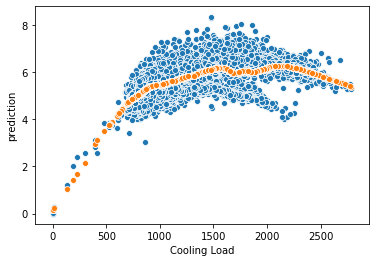

In [10]:
sns.scatterplot(x='Cooling Load', y='Before optimisation', data=df)
sns.scatterplot(x='Cooling Load', y='prediction', data=df)

In [11]:
newdf = df.sort_values('Cooling Load').iloc[::10, :]

In [13]:
df['Cooling Load (bins)'] = np.round((df['Cooling Load']/30.0))*30.0

In [14]:
mean_df = df.groupby('Cooling Load (bins)').mean()


In [15]:
mean_df['prediction'] = mean_df['prediction'].map(lambda x: x if x>0.1 else 0.1)

In [16]:
print('(x) => {')
print('if (x<%f){return %f;}' % (mean_df['Cooling Load'].iloc[0], mean_df['prediction'].iloc[0]))
for i in range(mean_df.shape[0]-1):
    print('if (x>=%f && x<%f){return %f;}' % (mean_df['Cooling Load'].iloc[i], mean_df['Cooling Load'].iloc[i+1],mean_df['prediction'].iloc[i] ))
print('return %f;}' % mean_df['prediction'].iloc[i])

(x) => {
if (x<1.260994){return 0.175625;}
if (x>=1.260994 && x<131.628298){return 0.175625;}
if (x>=131.628298 && x<190.804610){return 1.034925;}
if (x>=190.804610 && x<227.072782){return 1.424349;}
if (x>=227.072782 && x<298.782025){return 1.665034;}
if (x>=298.782025 && x<393.262012){return 2.155875;}
if (x>=393.262012 && x<416.871298){return 2.940069;}
if (x>=416.871298 && x<482.199424){return 3.135142;}
if (x>=482.199424 && x<534.057187){return 3.503134;}
if (x>=534.057187 && x<605.953213){return 3.785451;}
if (x>=605.953213 && x<624.678219){return 4.214460;}
if (x>=624.678219 && x<645.024046){return 4.317841;}
if (x>=645.024046 && x<693.955755){return 4.421490;}
if (x>=693.955755 && x<721.339438){return 4.671006;}
if (x>=721.339438 && x<748.507257){return 4.785114;}
if (x>=748.507257 && x<781.198780){return 4.873257;}
if (x>=781.198780 && x<810.569200){return 4.974217;}
if (x>=810.569200 && x<840.639418){return 5.062497;}
if (x>=840.639418 && x<870.972828){return 5.171691;}
if (x